## TP2: Audio

In [ ]:
import os 
import random
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
import kagglehub

### Telechargement des fichier audio de kaggle

In [ ]:
path = kagglehub.dataset_download('ouaraskhelilrafik/tp-02-audio')
print("path to dataset files",path)

c:\Users\rayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 58.0M/58.0M [00:35<00:00, 1.70MB/s]

Extracting files...


path to dataset files C:\Users\rayan\.cache\kagglehub\datasets\ouaraskhelilrafik\tp-02-audio\versions\1


In [10]:
data_path = os.path.join(path, 'Data','Data','101 - Dog')
audio_files = (f for f in os.listdir(data_path) if f.endswith('.ogg'))

### Tester le son

In [11]:
file = random.choice(list(audio_files))
file_path = os.path.join(data_path, file)
Audio(file_path)

### Waveform du signal sonore

Taille du signal : 220544 échantillons
Durée du signal : 5.00 secondes
Fréquence d'échantillonnage : 44100 Hz


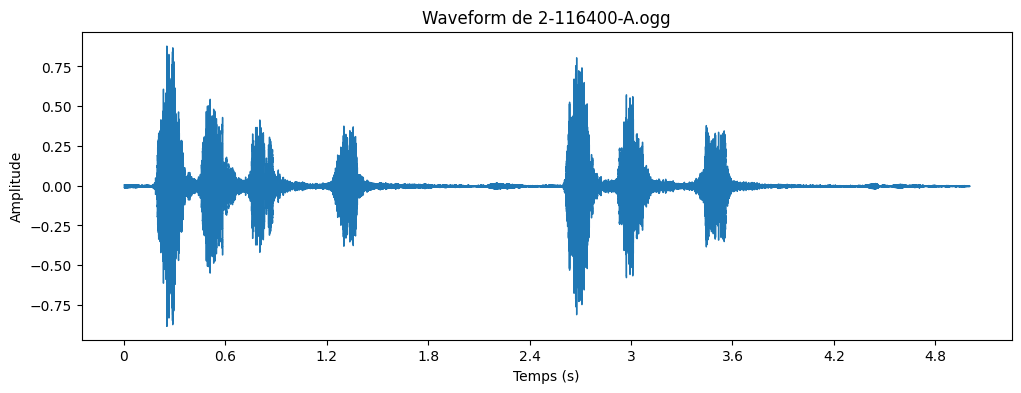

In [ ]:
y, sr = librosa.load(file_path, sr=None)  # sr=None garde la fréquence originale


signal_length = len(y)
duration = signal_length / sr
print(f"Taille du signal : {signal_length} échantillons")
print(f"Durée du signal : {duration:.2f} secondes")
print(f"Fréquence d'échantillonnage : {sr} Hz")


plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform de {file}")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.show()

### Calcul de la waveform

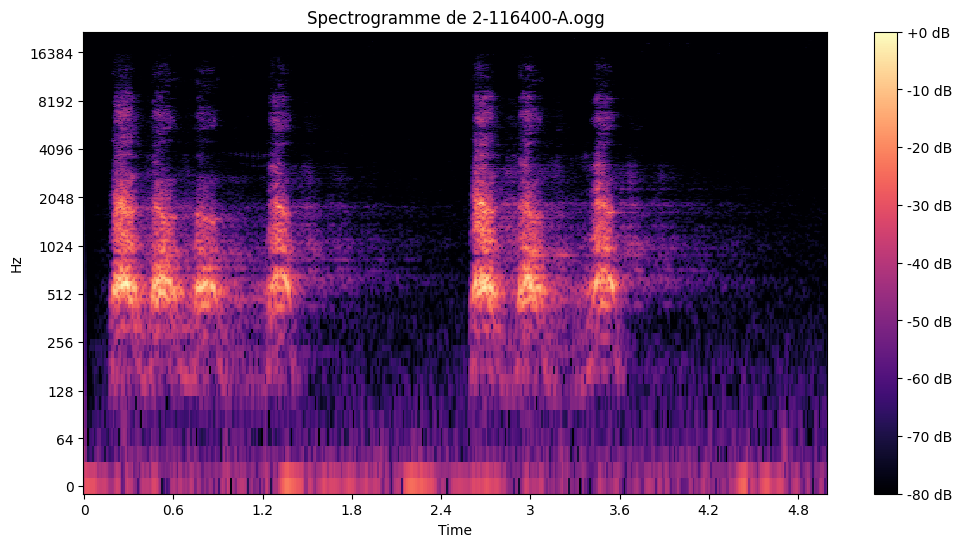

In [13]:
D = np.abs(librosa.stft(y))
DB = librosa.amplitude_to_db(D, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Spectrogramme de {file}")
plt.show()